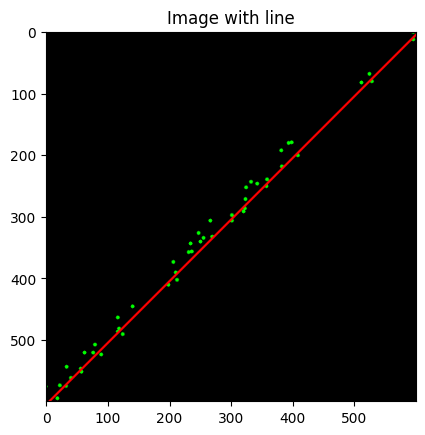

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carrega Imagem
img = cv2.imread('/content/pontos_ransac.png')

# Converte para Cinz
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detectção de bordas
edges = cv2.Canny(gray, 50, 150)

def ransac_line(edges, num_samples=2, threshold=0.5, max_trials=1000):
    # índices das arestas
    indices = np.argwhere(edges > 0)

    # Melhores parametros
    best_line = None
    best_inliers = 0

    for _ in range(max_trials):
        # Pegas 2 pontos aleatorios
        idx1, idx2 = np.random.choice(indices.shape[0], 2, replace=False)
        x1, y1 = indices[idx1]
        x2, y2 = indices[idx2]

        if x2 - x1 == 0:
            continue

        # Calcule a inclinação e a interceptação da linha
        slope = (y2 - y1) / (x2 - x1)
        intercept = y1 - slope * x1

        # Verificação da inclinação e interceptação
        if np.isnan(slope) or np.isinf(slope) or np.isnan(intercept) or np.isinf(intercept):
            continue

        # inliers
        inliers = 0
        for x, y in indices:
            if np.abs(y - (slope * x + intercept)) < threshold:
                inliers += 1

        # update melhores parametros
        if inliers > best_inliers:
            best_inliers = inliers
            best_line = (slope, intercept)

    return best_line

line_params = ransac_line(edges)
slope, intercept = line_params

# Desenha linha vermelha
x1, y1 = 0, int(intercept)
x2, y2 = img.shape[1], int(slope * img.shape[1] + intercept)
cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# printa a imagem
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image with line')
plt.show()